## Segmentation


In [2]:
from fastbook import *


In [3]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [4]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/vlad/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|███████████████████████████████████████████████████████████████| 83.3M/83.3M [00:03<00:00, 25.9MB/s]


epoch,train_loss,valid_loss,time
0,2.679570,2.148780,00:14


epoch,train_loss,valid_loss,time
0,1.689126,1.394173,00:17
1,1.494169,1.274897,00:16
2,1.373158,1.117013,00:18
3,1.270239,1.010339,00:17
4,1.173247,0.924711,00:16
5,1.082592,0.881134,00:18
6,1.000937,0.810807,00:17
7,0.934925,0.790773,00:16


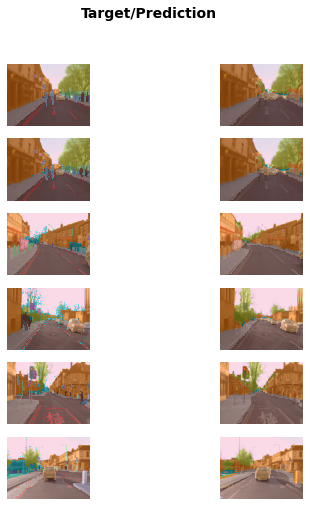

In [5]:
learn.show_results(max_n=6, figsize=(7,8))